In [1]:
# coding 
import math
from math import sqrt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy.stats
import scipy
import os

# needed for modeling
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20
import requests
from statsmodels.tsa.api import Holt
#importing data frame from acquire.py file
import acquire
import prepare

In [2]:
df = acquire.all_gas_data()
df

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,...,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73273,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.120,2.022,2.329,2.540,2.379,2.778,2.792,2.661,2.947,2.502
73274,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.156,2.063,2.355,2.567,2.412,2.798,2.820,2.694,2.968,2.526
73275,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.158,2.063,2.361,2.565,2.407,2.800,2.821,2.693,2.973,2.559
73276,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.224,2.137,2.410,2.618,2.466,2.843,2.871,2.749,3.015,2.619


In [3]:
#preparing data
df = prepare.prep_gas_data(df)
df = df.drop(columns=['month'])
df

,gasoline,diesel
Date,,
1995-01-02,1.127,1.104
1995-01-09,1.134,1.102
1995-01-16,1.126,1.100
1995-01-23,1.132,1.095
1995-01-30,1.131,1.090
...,...,...
2020-11-30,2.211,2.502
2020-12-07,2.246,2.526
2020-12-14,2.247,2.559


In [4]:
# vizualizing the data

<Figure size 864x720 with 0 Axes>

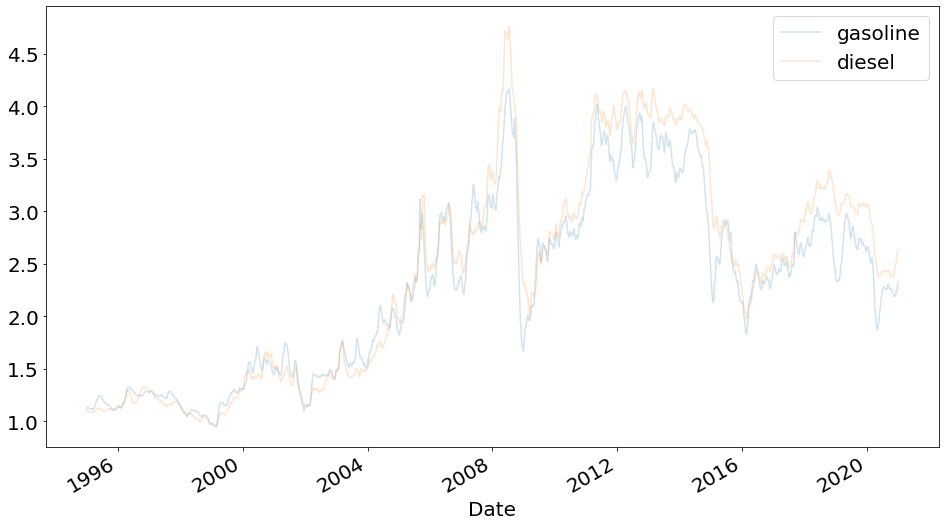

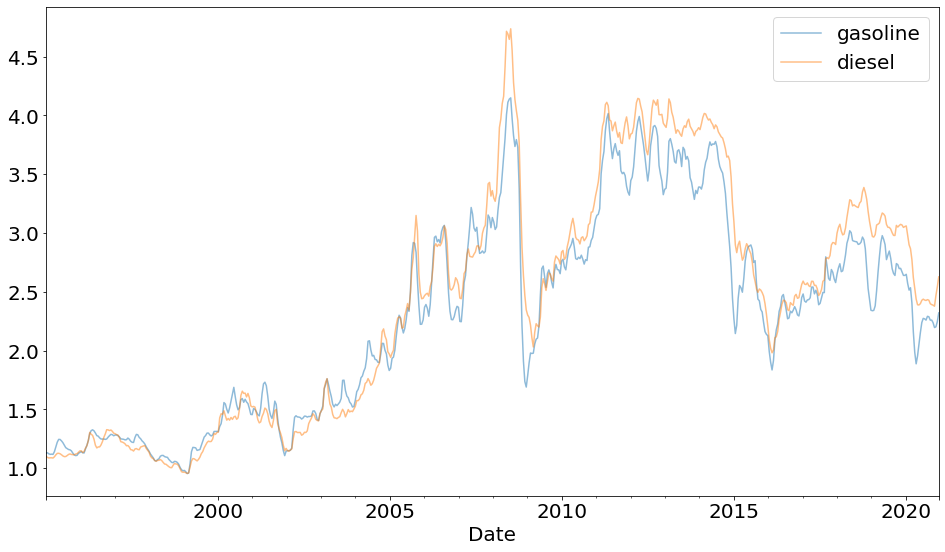

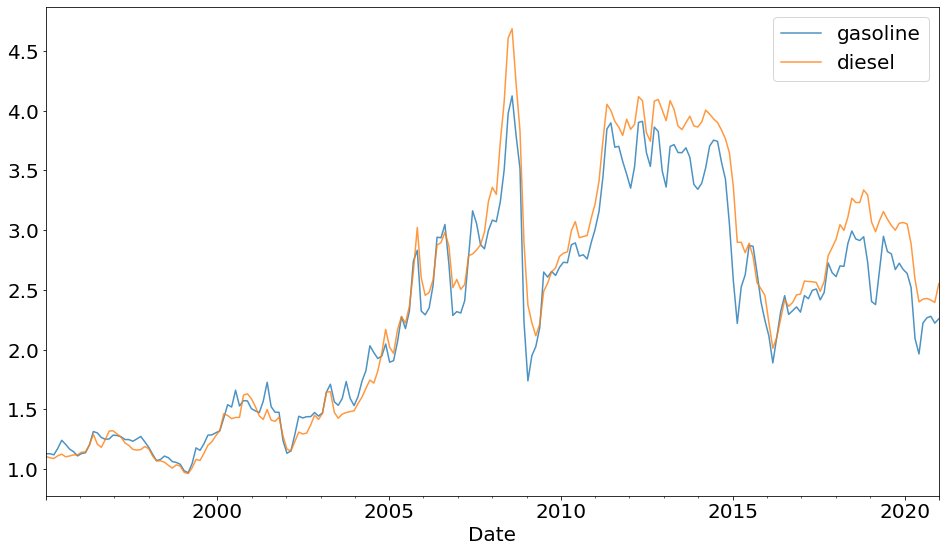

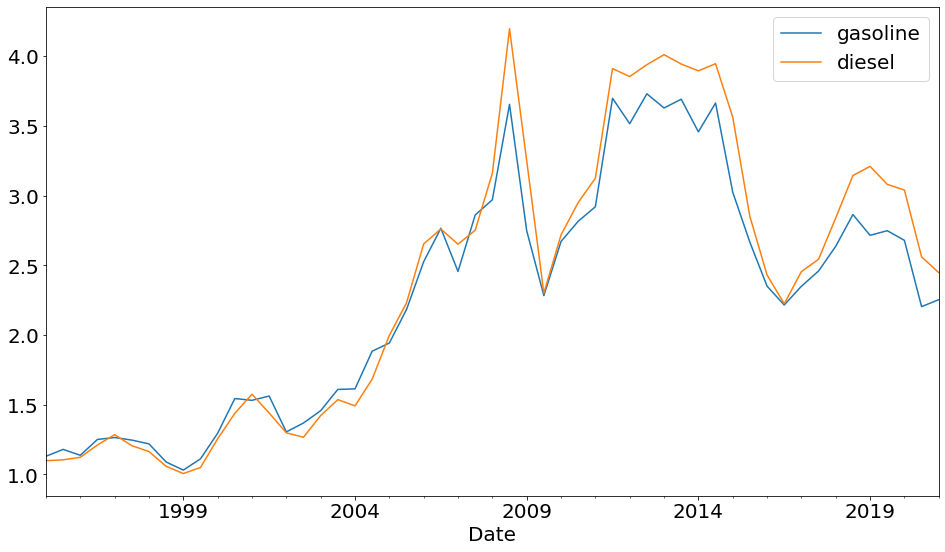

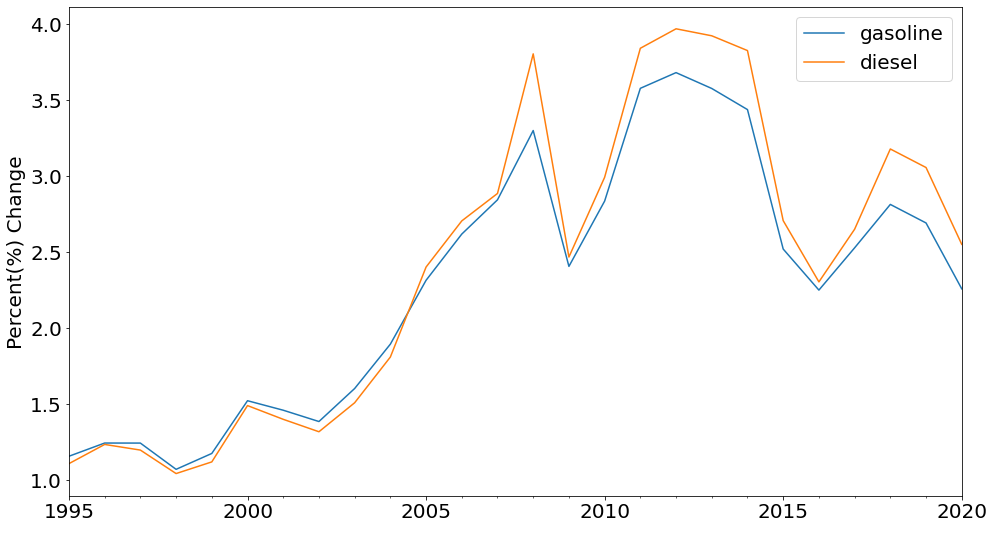

In [5]:
plt.figure(figsize=(12,10))
df.plot(alpha=.2, label='hourly')
df.resample('15D').mean().plot(alpha=0.5, label='15-Day')
df.resample('6w').mean().plot(alpha=0.8, label='6-Week')
df.resample('6M').mean().plot(label='6-Month')
df.resample('Y').mean().plot(label='Yearly',  xlabel=' ',
                                        ylabel='Percent(%) Change')
plt.legend()

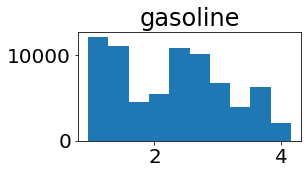

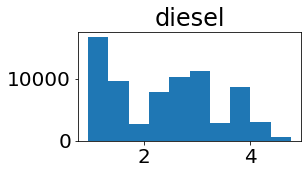

In [6]:
for col in df.columns:
    #graph size
    plt.figure(figsize=(4,2))
    #histogram graph
    plt.hist(df[col])
    #title of column
    plt.title(col)
    # show graph
    plt.show()

In [7]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73278 entries, 1995-01-02 to 2020-12-28
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gasoline  73278 non-null  float64
 1   diesel    73278 non-null  float64
dtypes: float64(2)
memory usage: 1.7 MB


In [8]:
#resampling by year
df.resample('Y').mean()

,gasoline,diesel
Date,,
1995-12-31,1.157712,1.109154
1996-12-31,1.244528,1.235283
1997-12-31,1.244250,1.198308
1998-12-31,1.071712,1.043885
1999-12-31,1.176058,1.120519
2000-12-31,1.522731,1.490769
2001-12-31,1.460302,1.400509
2002-12-31,1.385962,1.318750
2003-12-31,1.603019,1.509327


<AxesSubplot:xlabel='Date'>

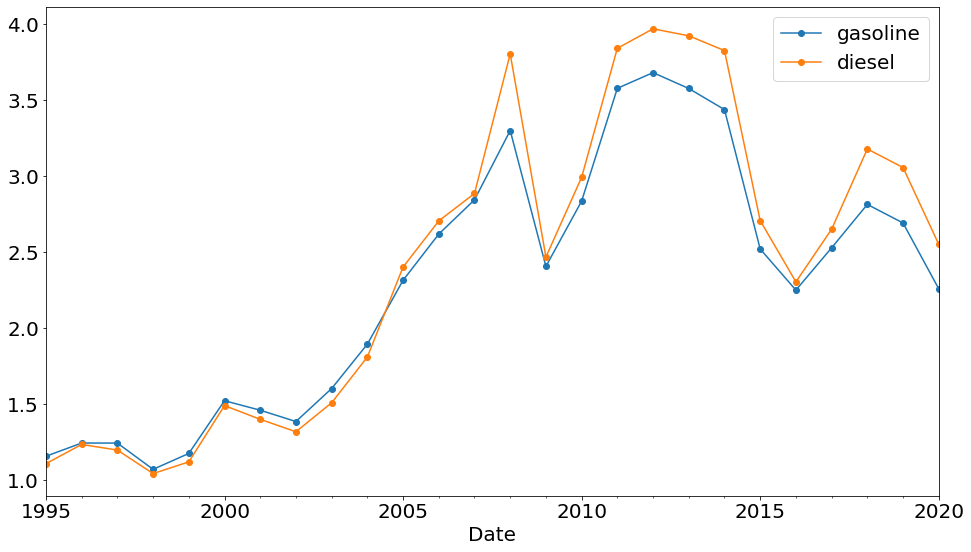

In [9]:
#vizualizing 
df.resample('Y').mean().plot(marker='o')

In [10]:
df.resample('M').mean()

,gasoline,diesel
Date,,
1995-01-31,1.13000,1.09820
1995-02-28,1.12025,1.08775
1995-03-31,1.11850,1.08750
1995-04-30,1.15725,1.10400
1995-05-31,1.22520,1.12500
...,...,...
2020-08-31,2.27220,2.42920
2020-09-30,2.27350,2.41375
2020-10-31,2.24825,2.38875


<AxesSubplot:xlabel='Date'>

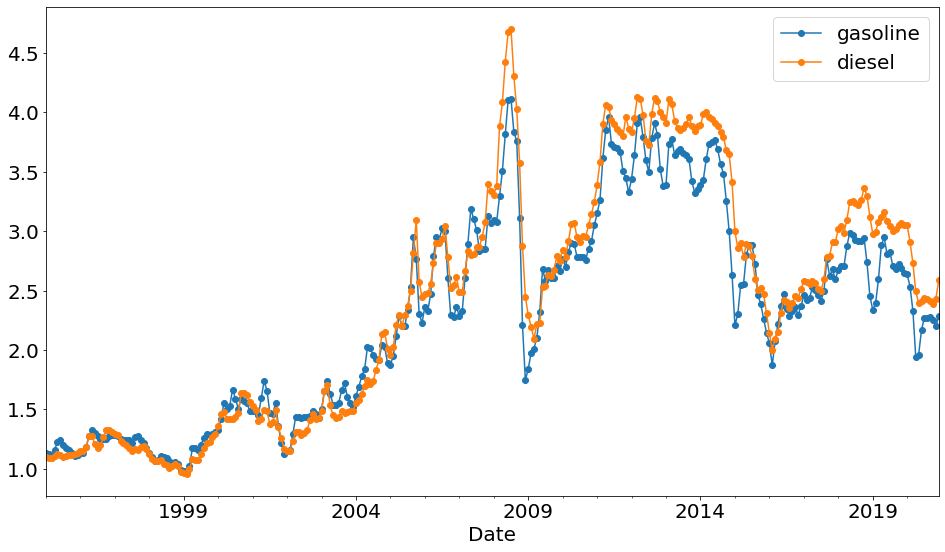

In [11]:
df.resample('M').mean().plot(marker='o')

In [12]:
df.resample('3m').mean()

,gasoline,diesel
Date,,
1995-01-31,1.130000,1.098200
1995-04-30,1.132000,1.093083
1995-07-31,1.220286,1.114214
1995-10-31,1.152231,1.113231
1996-01-31,1.122154,1.132538
1996-04-30,1.203923,1.205692
1996-07-31,1.297769,1.216692
1996-10-31,1.248769,1.262923
1997-01-31,1.280769,1.307538


<AxesSubplot:xlabel='Date'>

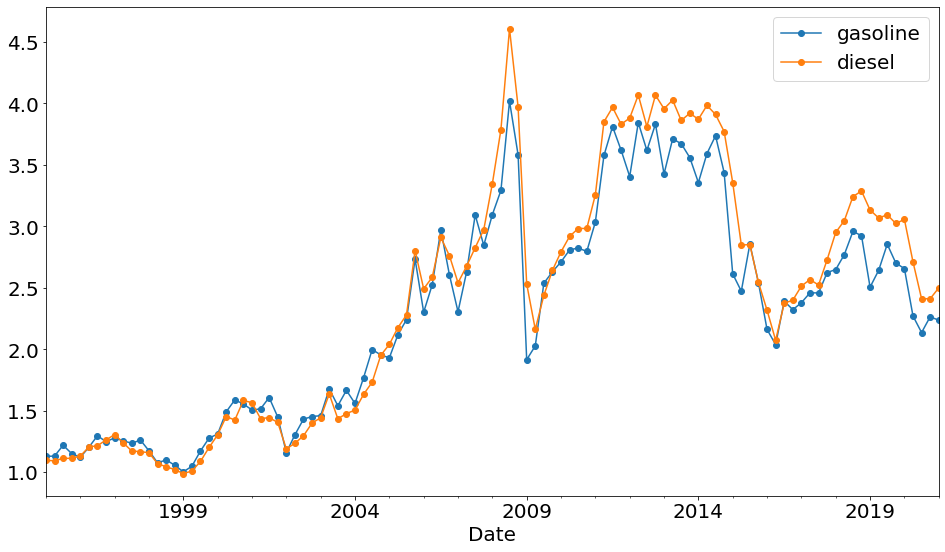

In [13]:
df.resample('3m').mean().plot(marker='o')

<AxesSubplot:title={'center':'Average month-to-month change in gas prices'}, xlabel='Date'>

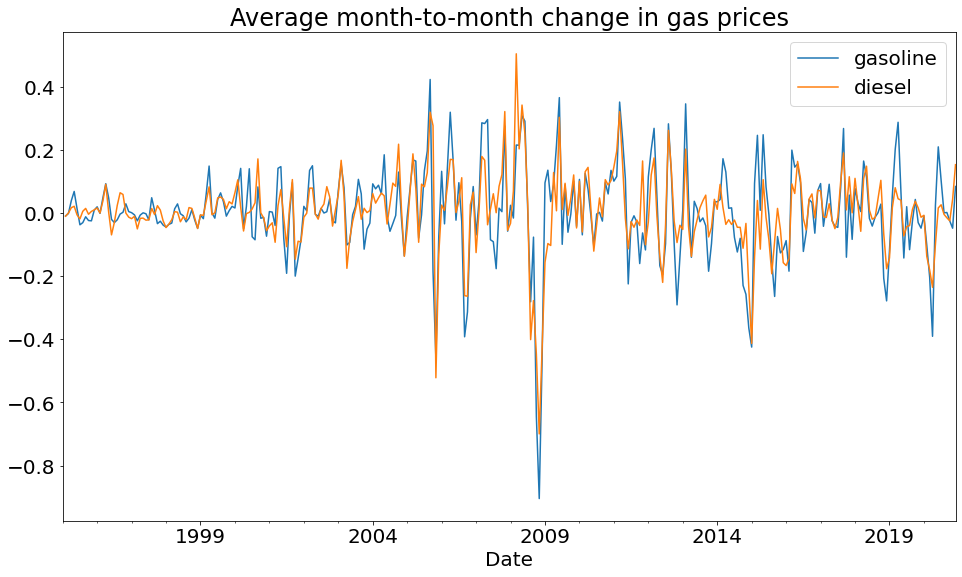

In [14]:
df.resample('M').mean().diff().plot(title='Average month-to-month change in gas prices')

### splitting data

In [46]:
df_resampled = df.resample('6w')[['gasoline','diesel']].mean()
# set train size to be 50% of total 
train_size = int(round(df_resampled.shape[0] * 0.5))
# set validate size to be 30% of total 
validate_size = int(round(df_resampled.shape[0] * 0.5))
# set test size to be number of rows remaining. 
test_size = int(round(df_resampled.shape[0] * 0.2))


In [47]:
# validate
validate_end_index = train_size + validate_size
validate_end_index
# train 
train = df_resampled[:train_size]
# validate 
validate = df_resampled[train_size:validate_end_index]
# test
test = df_resampled[validate_end_index:]

In [48]:
train.head()

,gasoline,diesel
Date,,
1995-01-08,1.127000,1.104000
1995-02-19,1.128000,1.093500
1995-04-02,1.118333,1.087833
1995-05-14,1.173167,1.110167
1995-06-25,1.240167,1.123833


In [49]:
#looking at the data.
train.shape[0], validate.shape[0], test.shape[0]

(114, 113, 0)

In [50]:
# is len of train + validate + test == lenght of entire dataframe. 
len(train) + len(validate) + len(test) == len(df_resampled)

True

# Vizualisations

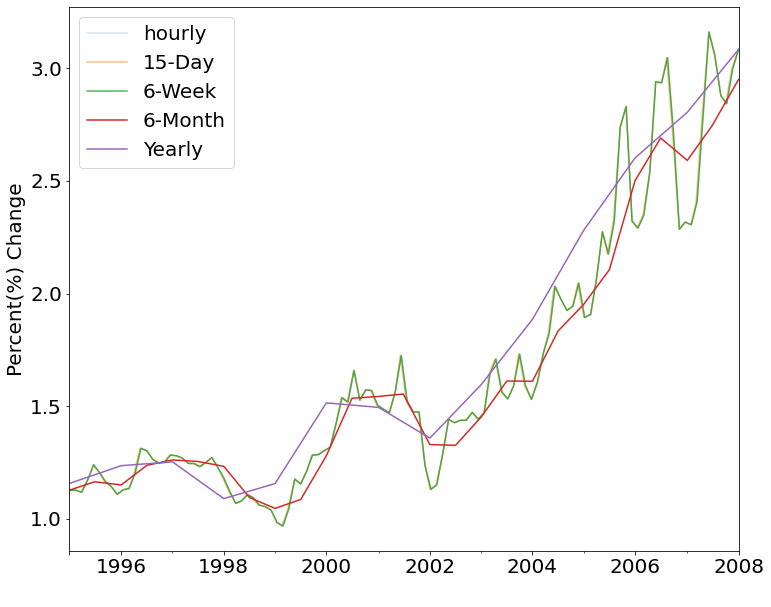

In [51]:
# set y
y = train.gasoline
plt.figure(figsize=(12,10))
y.plot(alpha=.2, label='hourly')
y.resample('15D').mean().plot(alpha=0.5, label='15-Day')
y.resample('6w').mean().plot(alpha=0.8, label='6-Week')
y.resample('6M').mean().plot(label='6-Month')
y.resample('Y').mean().plot(label='Yearly',  xlabel=' ',
                                        ylabel='Percent(%) Change')
plt.legend()

<AxesSubplot:title={'center':'Volitility of the gas price % Change Over a 6 week Time period'}, xlabel=' '>

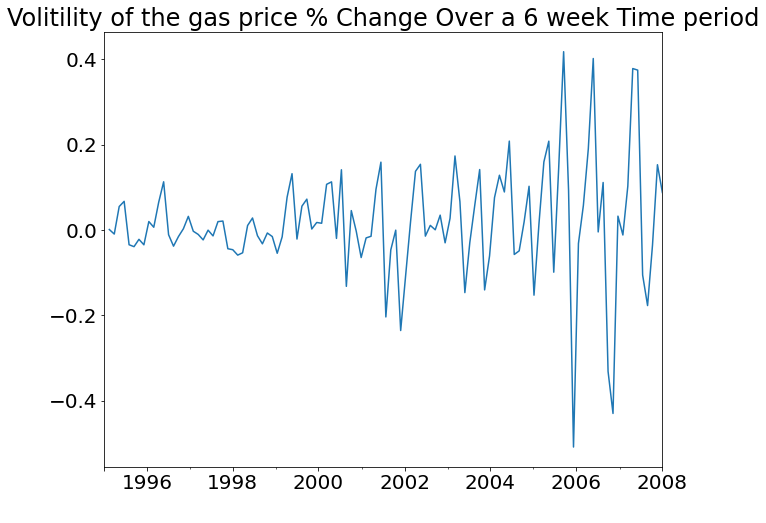

In [52]:

plt.figure(figsize=(10,8))
y.resample('6w').mean().diff().plot(title='Volitility of the gas price % Change Over a 6 week Time period', xlabel= ' ')

In [53]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var])
    plt.plot(validate[target_var])
    plt.plot(test[target_var])
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    #rmse = evaluate(target_var)
    #print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()
    
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

### Forecast
Forecasting is another word for predicting time series data.

- Last Observed Value: The future will look like the now
- Simple Average: The future will look, on average, like history.
- Moving Average: The future will look, on average, like recent history.
- Holt's Linear Trend
- Previous Cycle
### Last observed value
The simplest method for forecasting is to predict all future values to be the last observed value.

### Make Predictions

### Gasoline prices

In [54]:
# take the last item of sales total and assign to variable
last_gas_price = train['gasoline'][-1:][0]
last_gas_price

3.0831666666666666

## Diesel prices

In [55]:
# take the last item of quantity and assign to variable
last_diesel_price = round(train['diesel'][-1:][0],2)
last_diesel_price

3.36

In [56]:
yhat_df = pd.DataFrame(
    {'gasoline': [last_gas_price],
     'diesel': [last_diesel_price]},
    index=validate.index)

yhat_df.head()

,gasoline,diesel
Date,,
2008-02-17,3.083167,3.36
2008-03-30,3.083167,3.36
2008-05-11,3.083167,3.36
2008-06-22,3.083167,3.36
2008-08-03,3.083167,3.36


In [57]:
#describing the data
yhat_df.describe()

,gasoline,diesel
count,1.130000e+02,1.130000e+02
mean,3.083167e+00,3.360000e+00
std,3.122471e-15,8.921347e-15
min,3.083167e+00,3.360000e+00
25%,3.083167e+00,3.360000e+00
50%,3.083167e+00,3.360000e+00
75%,3.083167e+00,3.360000e+00
max,3.083167e+00,3.360000e+00


## Simple Average
Take the simple average of historical values and use that value to predict future values.

This is a good option for an initial baseline. Every future datapoint (those in 'test') will be assigned the same value, and that value will be the overall mean of the values in train.

Make Predictions

Gasoline(prices): establishing the value of the prediction we will make

In [58]:
# compute simple average
avg_gas = round(train['gasoline'].mean(), 2)
avg_gas

1.65

In [59]:
avg_diesel = round(train['diesel'].mean(), 2)
avg_diesel

1.63

In [60]:
def make_predictions(gas=None, diesel=None):
    yhat_df = pd.DataFrame({'gasoline': [gas],
                           'diesel': [diesel]},
                          index=validate.index)
    return yhat_df

In [61]:
yhat_df = make_predictions(avg_gas, avg_diesel)
yhat_df.head()

,gasoline,diesel
Date,,
2008-02-17,1.65,1.63
2008-03-30,1.65,1.63
2008-05-11,1.65,1.63
2008-06-22,1.65,1.63
2008-08-03,1.65,1.63


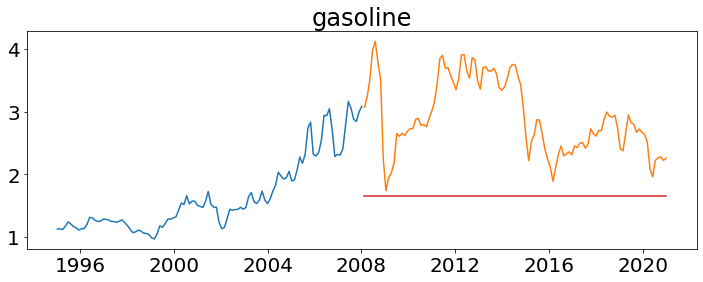

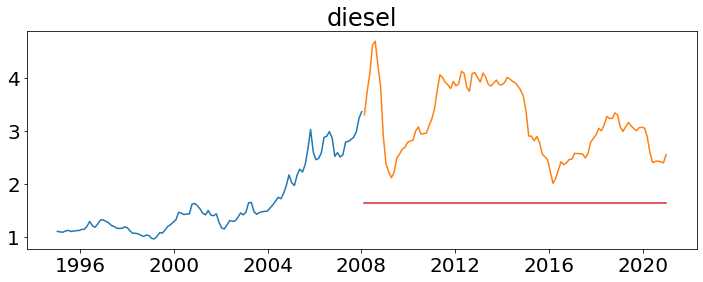

In [62]:
for col in train.columns:
    plot_and_eval(col)

### Moving Average
In this example, we will use a 30-day moving average to forecast. In other words, the average over the last 30-days will be used as the forecasted value.

In [63]:
# demonstrate that the mean of the month 
# rolling monthly prices
print(train['gasoline'].rolling(1).mean())

Date
1995-01-08    1.127000
1995-02-19    1.128000
1995-04-02    1.118333
1995-05-14    1.173167
1995-06-25    1.240167
1995-08-06    1.205500
1995-09-17    1.166333
1995-10-29    1.144333
1995-12-10    1.109500
1996-01-21    1.129167
1996-03-03    1.135500
1996-04-14    1.200500
1996-05-26    1.313333
1996-07-07    1.302167
1996-08-18    1.264167
1996-09-29    1.248667
1996-11-10    1.251500
1996-12-22    1.283333
1997-02-02    1.280333
1997-03-16    1.269833
1997-04-27    1.246500
1997-06-08    1.246000
1997-07-20    1.232000
1997-08-31    1.251500
1997-10-12    1.272333
1997-11-23    1.228333
1998-01-04    1.182000
1998-02-15    1.123000
1998-03-29    1.069500
1998-05-10    1.079833
1998-06-21    1.107833
1998-08-02    1.094333
1998-09-13    1.061833
1998-10-25    1.054667
1998-12-06    1.039167
1999-01-17    0.984500
1999-02-28    0.968333
1999-04-11    1.045000
1999-05-23    1.176833
1999-07-04    1.155500
1999-08-15    1.211167
1999-09-26    1.283333
1999-11-07    1.285500
1999-1

In [64]:
period=30
train['gasoline'].rolling(period).mean()[-1]

2.5124166666666667

In [65]:
period = 12

# take monthly rolling average, then take the last element and that will the one that propogates 
# forward as our prediction. 
rolling_gas = round(train['gasoline'].rolling(period).mean()[-1], 2)
rolling_diesel = round(train['diesel'].rolling(period).mean()[-1], 2)
print(rolling_gas, rolling_diesel)

2.74 2.82


In [66]:
yhat_df = make_predictions(rolling_gas, rolling_diesel)
yhat_df

,gasoline,diesel
Date,,
2008-02-17,2.74,2.82
2008-03-30,2.74,2.82
2008-05-11,2.74,2.82
2008-06-22,2.74,2.82
2008-08-03,2.74,2.82
2008-09-14,2.74,2.82
2008-10-26,2.74,2.82
2008-12-07,2.74,2.82
2009-01-18,2.74,2.82


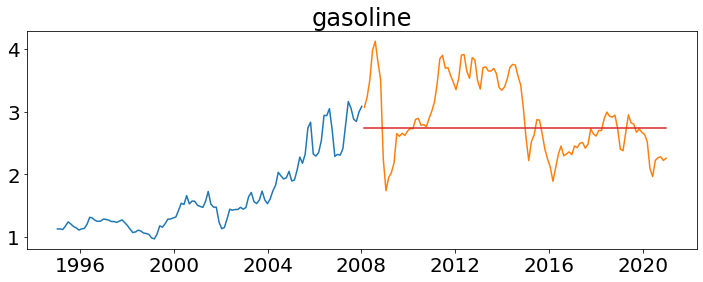

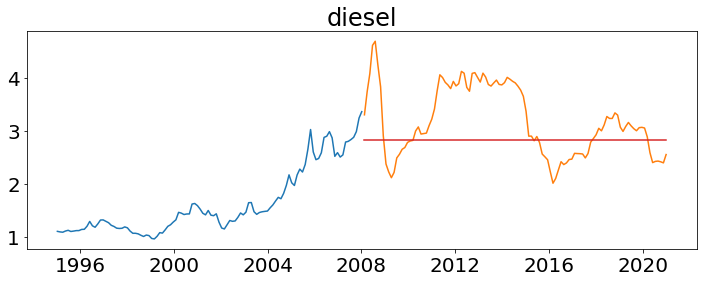

In [67]:
for col in train.columns:
    plot_and_eval(col)

## Seasonal Decomposition

diesel 



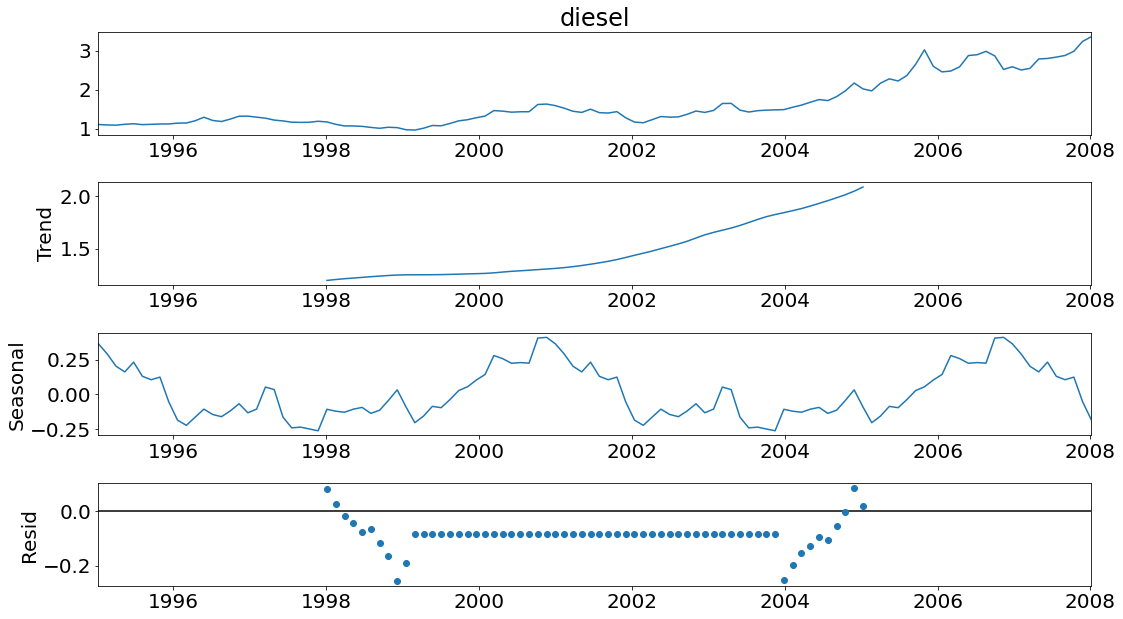

In [68]:
import statsmodels.api as sm
#graphing trends for federal wage
print(col, '\n')
sm.tsa.seasonal_decompose(train[col].resample('6w').mean()).plot()
plt.show()

gasoline 

diesel 



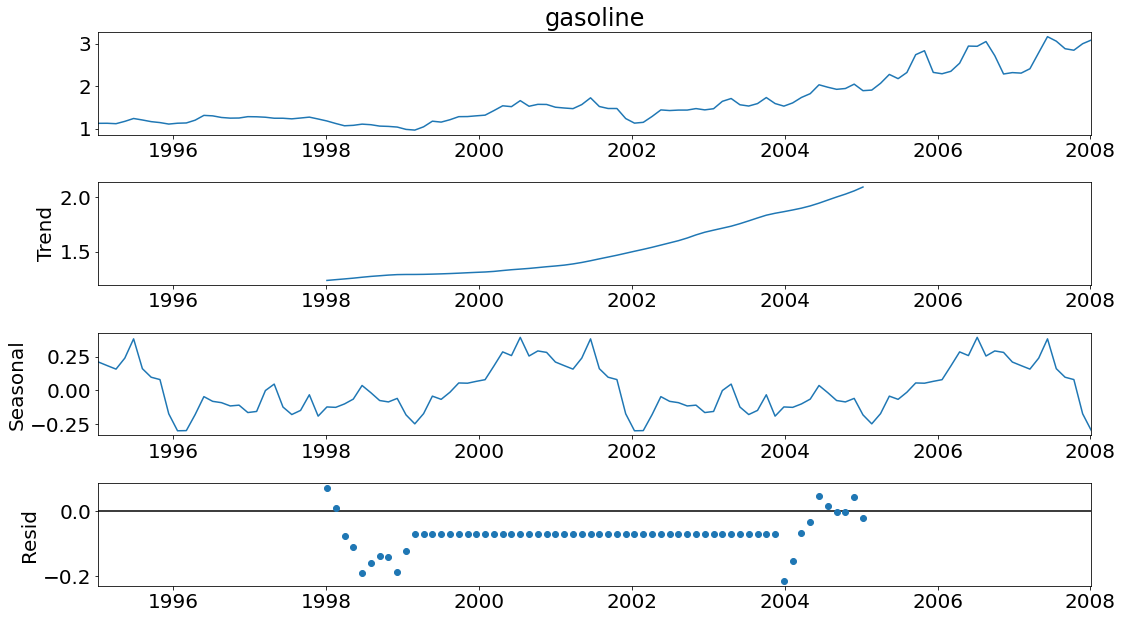

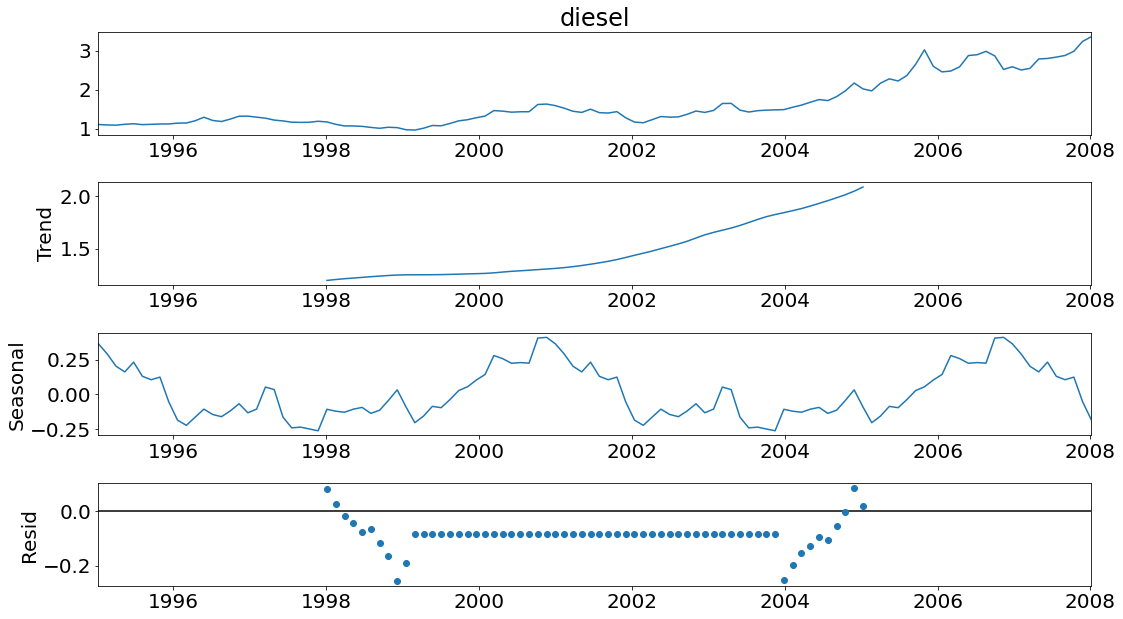

In [69]:
#graphing trends for gasolone
for col in train.columns:
    print(col,'\n')
    sm.tsa.seasonal_decompose(train[col].resample('6w').mean()).plot()

## Basic Holt's Linear Trend

In [70]:
df_resampled = df.resample('6w')[['gasoline','diesel']].mean()
# set train size to be 50% of total 
train_size = int(round(df_resampled.shape[0] * 0.333))
# set validate size to be 30% of total 
validate_size = int(round(df_resampled.shape[0] * 0.333))
# set test size to be number of rows remaining. 
test_size = int(round(df_resampled.shape[0] * 0.333))
len(df_resampled) == train_size + validate_size + test_size
# validate will go from 912 to 912+547
validate_end_index = train_size + validate_size
validate_end_index
# train will go from 0 to 911
train = df_resampled[:train_size]
# validate will go from 912 to 1458
validate = df_resampled[train_size:validate_end_index]
# test will include 1459 to the end
test = df_resampled[validate_end_index:]

In [71]:
col = ['gasoline'] 
# create our Holt's Object
model = Holt(train[col], exponential=False, damped=True)

In [72]:
# fit the holt's object
model = model.fit(optimized=True)

In [73]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])


In [74]:
# create a dataframe with the average rise in gas prices

gas = round(train['gasoline'].mean(),2)
diesel = round(train['diesel'].mean(),2)

yhat_df = pd.DataFrame({'gasoline':[gas],
                        'diesel':[diesel]}, index=test.index)

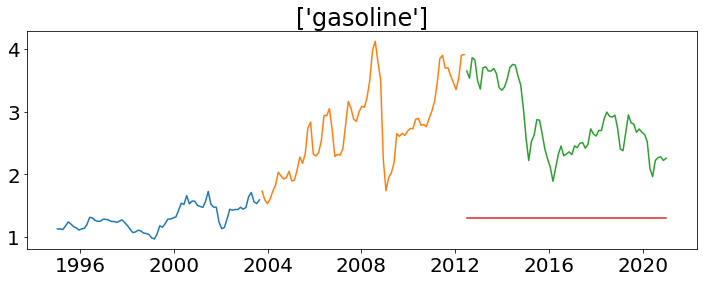

In [75]:
# Plot actual vs predicted
plot_and_eval(col)